## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools
import heapq

## Dataset Original

In [2]:
dataset = pd.read_csv('../CreatingDataset/FrequencyDomain/Dataset.csv')
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,3.93,2.513044,8.163932,33.629912,7.659697,6.725006,10.643506,13.177546,59.482317,10.749250,...,1.888285,2.273819,1.312697,1.323685,2.193599,2.599519,2.390184,3.165756,0.534784,Notebook
1,1.00,0.191735,4.678745,23.926314,8.975643,6.839434,8.616491,10.477577,54.968947,3.580283,...,0.184238,1.160567,0.852239,1.300667,0.425774,1.524319,0.897228,1.132210,0.852345,Notebook
2,3.07,3.250578,3.296642,28.901722,7.726107,9.185737,9.997531,13.401718,53.479286,8.655162,...,0.802962,0.547124,0.942776,0.718461,0.779437,0.926345,1.893492,0.777703,0.770305,Notebook
3,1.94,0.968233,4.019366,27.971932,10.626979,7.588198,9.675171,14.644327,55.259634,3.368294,...,1.568216,1.422735,0.251880,0.763626,1.406309,1.429444,0.035365,1.100480,0.615161,Notebook
4,4.44,1.646007,4.716094,32.419320,8.428120,8.383729,11.016293,12.865954,56.504946,12.448456,...,2.359542,0.006621,0.500235,0.081978,0.039892,2.824678,1.531935,0.927873,1.221977,Notebook


# PARTE 1
Correntes Isoladas

### Classes do Dataset

In [15]:
new_dataset = dataset.loc[0:799]

In [16]:
device_position = '100'
classes=[]
for i in new_dataset[device_position]:
    if i not in classes:
        classes.append(i)
print('Exemplos\t Classes\n')
for classe in classes:
    num_exemplos = new_dataset[new_dataset[device_position]==classe].count()[0]
    print(num_exemplos, '\t\t',classe)

print()
print('Número de Classes:', len(classes))

Exemplos	 Classes

200 		 Notebook
200 		 Ventilador
200 		 Liquidificador
200 		 Geladeira

Número de Classes: 4


### Holdout 80/20

In [17]:
y = new_dataset[device_position]
x = new_dataset.drop([device_position], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20)

## Treinamentos e Testes

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
previsaokNN = knn.predict(X_test)

KNN1 = accuracy_score(Y_test, previsaokNN)
print('Modelo:\tAcurácias:')
print('KNN:\t', KNN1)
      
nc = NearestCentroid()
nc.fit(X_train, Y_train)
previsaoNC = nc.predict(X_test)

CN1 = accuracy_score(Y_test, previsaoNC)
print('CN: \t', CN1)
      
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
previsaoGNB = gnb.predict(X_test)

GNB1 = accuracy_score(Y_test, previsaoGNB)
print('GNB:\t', GNB1)
      
MLP = MLPClassifier(hidden_layer_sizes=(12,11,11),
                     max_iter=1000, 
                     activation='identity', 
                     learning_rate='constant',
                     learning_rate_init=0.00001,
                     batch_size = 128,
                     solver = 'lbfgs')
MLP.fit(X_train, Y_train)
previsaoMLP = MLP.predict(X_test)

MLP1 = accuracy_score(Y_test, previsaoMLP)
print('MLP:\t', MLP1)

Modelo:	Acurácias:
KNN:	 1.0
CN: 	 0.9375
GNB:	 0.99375
MLP:	 1.0


# PARTE 2
Acrescentando-se ao dataset Correntes Combinadas dois a dois

In [22]:
new_dataset = dataset.loc[0:1999]

### Classes do Dataset

In [23]:
device_position = '100'
classes=[]
for i in new_dataset[device_position]:
    if i not in classes:
        classes.append(i)
print('Exemplos\t Classes\n')
for classe in classes:
    num_exemplos = new_dataset[new_dataset[device_position]==classe].count()[0]
    print(num_exemplos, '\t\t',classe)

print()
print('Número de Classes:', len(classes))

Exemplos	 Classes

200 		 Notebook
200 		 Ventilador
200 		 Liquidificador
200 		 Geladeira
200 		 NotebookVentilador
200 		 NotebookLiquidificador
200 		 NotebookGeladeira
200 		 VentiladorLiquidificador
200 		 VentiladorGeladeira
200 		 LiquidificadorGeladeira

Número de Classes: 10


### Holdout 80/20

In [24]:
y = new_dataset[device_position]
x = new_dataset.drop([device_position], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20)

## Treinamentos e Testes

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
previsaokNN = knn.predict(X_test)

KNN2 = accuracy_score(Y_test, previsaokNN)
print('Modelo:\tAcurácias:')
print('KNN:\t', KNN2)
      
nc = NearestCentroid()
nc.fit(X_train, Y_train)
previsaoNC = nc.predict(X_test)

CN2 = accuracy_score(Y_test, previsaoNC)
print('CN: \t', CN2)
      
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
previsaoGNB = gnb.predict(X_test)

GNB2 = accuracy_score(Y_test, previsaoGNB)
print('GNB:\t', GNB2)
      
MLP = MLPClassifier(hidden_layer_sizes=(12,11,11),
                     max_iter=1000, 
                     activation='identity', 
                     learning_rate='constant',
                     learning_rate_init=0.00001,
                     batch_size = 128,
                     solver = 'lbfgs')
MLP.fit(X_train, Y_train)
previsaoMLP = MLP.predict(X_test)

MLP2 = accuracy_score(Y_test, previsaoMLP)
print('MLP:\t', MLP2)

Modelo:	Acurácias:
KNN:	 0.7325
CN: 	 0.655
GNB:	 0.8425
MLP:	 0.915


# PARTE 3
Acrescentando-se ao dataset Correntes Combinadas três a três

In [26]:
new_dataset = dataset.loc[0:2799]

### Classes do Dataset

In [27]:
device_position = '100'
classes=[]
for i in new_dataset[device_position]:
    if i not in classes:
        classes.append(i)
print('Exemplos\t Classes\n')
for classe in classes:
    num_exemplos = new_dataset[new_dataset[device_position]==classe].count()[0]
    print(num_exemplos, '\t\t',classe)

print()
print('Número de Classes:', len(classes))

Exemplos	 Classes

200 		 Notebook
200 		 Ventilador
200 		 Liquidificador
200 		 Geladeira
200 		 NotebookVentilador
200 		 NotebookLiquidificador
200 		 NotebookGeladeira
200 		 VentiladorLiquidificador
200 		 VentiladorGeladeira
200 		 LiquidificadorGeladeira
200 		 NotebookVentiladorLiquidificador
200 		 NotebookVentiladorGeladeira
200 		 NotebookLiquidificadorGeladeira
200 		 VentiladorLiquidificadorGeladeira

Número de Classes: 14


### Holdout 80/20

In [28]:
y = new_dataset[device_position]
x = new_dataset.drop([device_position], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20)

## Treinamentos e Testes

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
previsaokNN = knn.predict(X_test)

KNN3 = accuracy_score(Y_test, previsaokNN)
print('Modelo:\tAcurácias:')
print('KNN:\t', KNN3)
      
nc = NearestCentroid()
nc.fit(X_train, Y_train)
previsaoNC = nc.predict(X_test)

CN3 = accuracy_score(Y_test, previsaoNC)
print('CN: \t', CN3)
      
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
previsaoGNB = gnb.predict(X_test)

GNB3 = accuracy_score(Y_test, previsaoGNB)
print('GNB:\t', GNB3)
      
MLP = MLPClassifier(hidden_layer_sizes=(12,11,11),
                     max_iter=1000, 
                     activation='identity', 
                     learning_rate='constant',
                     learning_rate_init=0.00001,
                     batch_size = 128,
                     solver = 'lbfgs')
MLP.fit(X_train, Y_train)
previsaoMLP = MLP.predict(X_test)

MLP3 = accuracy_score(Y_test, previsaoMLP)
print('MLP:\t', MLP3)

Modelo:	Acurácias:
KNN:	 0.5875
CN: 	 0.5607142857142857
GNB:	 0.7607142857142857
MLP:	 0.85


# PARTE 4
Acrescentando-se ao dataset Correntes Combinadas quatro a quatro

In [30]:
new_dataset = dataset.loc[0:2999]

### Classes do Dataset

In [31]:
device_position = '100'
classes=[]
for i in new_dataset[device_position]:
    if i not in classes:
        classes.append(i)
print('Exemplos\t Classes\n')
for classe in classes:
    num_exemplos = new_dataset[new_dataset[device_position]==classe].count()[0]
    print(num_exemplos, '\t\t',classe)

print()
print('Número de Classes:', len(classes))

Exemplos	 Classes

200 		 Notebook
200 		 Ventilador
200 		 Liquidificador
200 		 Geladeira
200 		 NotebookVentilador
200 		 NotebookLiquidificador
200 		 NotebookGeladeira
200 		 VentiladorLiquidificador
200 		 VentiladorGeladeira
200 		 LiquidificadorGeladeira
200 		 NotebookVentiladorLiquidificador
200 		 NotebookVentiladorGeladeira
200 		 NotebookLiquidificadorGeladeira
200 		 VentiladorLiquidificadorGeladeira
200 		 NotebookVentiladorLiquidificadorGeladeira

Número de Classes: 15


## Holdout 80/20

In [32]:
y = new_dataset[device_position]
x = new_dataset.drop([device_position], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20)

## Treinamentos e Testes

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
previsaokNN = knn.predict(X_test)

KNN4 = accuracy_score(Y_test, previsaokNN)
print('Modelo:\tAcurácias:')
print('KNN:\t', KNN4)
      
nc = NearestCentroid()
nc.fit(X_train, Y_train)
previsaoNC = nc.predict(X_test)

CN4 = accuracy_score(Y_test, previsaoNC)
print('CN: \t', CN4)
      
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
previsaoGNB = gnb.predict(X_test)

GNB4 = accuracy_score(Y_test, previsaoGNB)
print('GNB:\t', GNB4)
      
MLP = MLPClassifier(hidden_layer_sizes=(12,11,11),
                     max_iter=1000, 
                     activation='identity', 
                     learning_rate='constant',
                     learning_rate_init=0.00001,
                     batch_size = 128,
                     solver = 'lbfgs')
MLP.fit(X_train, Y_train)
previsaoMLP = MLP.predict(X_test)

MLP4 = accuracy_score(Y_test, previsaoMLP)
print('MLP:\t', MLP4)

Modelo:	Acurácias:
KNN:	 0.5875
CN: 	 0.5607142857142857
GNB:	 0.7607142857142857
MLP:	 0.85


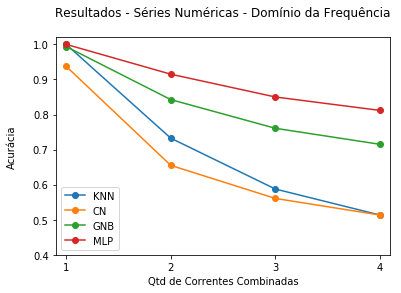

In [60]:
y = [KNN1, KNN2, KNN3, KNN4]
x = ['1', '2', '3', '4']
plt.plot(x, y, marker = 'o', label='KNN')


y = [CN1, CN2, CN3, CN4]
plt.plot(x, y, marker='o', label='CN')

y = [GNB1, GNB2, GNB3, GNB4]
plt.plot(x, y, marker='o', label='GNB')

y = [MLP1, MLP2, MLP3, MLP4]
plt.plot(x, y, marker='o', label='MLP')


plt.legend()
plt.title('Resultados - Séries Numéricas - Domínio da Frequência\n')
plt.ylabel("Acurácia\n")
plt.axis([-0.1, 3.1, 0.4, 1.02])
plt.xlabel("Qtd de Correntes Combinadas")
plt.savefig('Resultados - Séries Numéricas - Domínio da Frequência')